<a href="https://colab.research.google.com/github/zahrasa/Spam_OR_Ham/blob/main/spam_or_ham_email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture

!pip install parsivar

In [2]:
import requests
from string import punctuation


import os
import pandas as pd 
import numpy as np 
import csv

from pathlib import Path

import seaborn as sns 
import matplotlib.pyplot as plt 

from parsivar import Tokenizer, Normalizer, FindStems

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, f1_score, classification_report, roc_curve, roc_auc_score, accuracy_score

In [3]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Download the dataset
! rm -rf * 
! gdown 1LsFFFxwL6HGSs0nFZT3_G8_xL8Y7Z3K5

Downloading...
From: https://drive.google.com/uc?id=1LsFFFxwL6HGSs0nFZT3_G8_xL8Y7Z3K5
To: /content/email.zip
100% 754k/754k [00:00<00:00, 67.9MB/s]


In [ ]:
! unzip "email.zip"
! rm -r "email.zip"

## all training text to one train.csv
## all test text to one testing.csv

In [6]:
with open('train.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["text", "label"])

In [ ]:
context_ham = []
directory = 'ok_training'
    
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".txt"):
         print(os.path.join(directory, filename))
         with open(os.path.join(directory, filename)) as f:
           lines = f.readlines()
           context_ham.append(str(lines))
         continue

     else:
         continue

In [ ]:
context_spam = []
directory = 'spam_training'
    
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".txt"):
         print(os.path.join(directory, filename))
         with open(os.path.join(directory, filename)) as f:
           lines = f.readlines()
           context_spam.append(str(lines))
         continue

     else:
         continue

In [9]:
with open('train.csv', 'a', newline='') as file:
    writer = csv.writer(file)
    for i in range(len(context_ham)):
      writer.writerow([context_ham[i], "False"])

In [10]:
with open('train.csv', 'a', newline='') as file:
    writer = csv.writer(file)
    for i in range(len(context_spam)):
      writer.writerow([context_spam[i], "True"])

## working with train and testing.csv

In [11]:
train = pd.read_csv('./train.csv', encoding='utf-8')

In [25]:
train.tail()

,text,label
595,"['\ufeff\n', '\n', '\n', 'جدید ترین سرویس وبلا...",True
596,['\ufeff صابون ريز مايع با چشم الكترونيكي\n...,True
597,"['\ufeff\n', '\n', ' \n', '\n', '\t\n', '\n', ...",True
598,"['\ufeff\n', '*طالع بيني كوانتوم*\n', '\n', '*...",True
599,"['\ufeff\n', ' براي تمام ايراني ها\n', '\n'...",True


# Tokenizing and vectorizing

In [13]:
tokenizer = Tokenizer()
normalizer = Normalizer()
stemmer = FindStems()
my_punctuation = punctuation + '،"؛«»)\(><ufeffn'

def normalize_text (text) :
    tokens = tokenizer.tokenize_words(text)
    tokens = [stemmer.convert_to_stem(word).split('&')[0] for word in tokens]
    text = ' '.join([word for word in tokens if word not in list(my_punctuation)])
    
    return text

In [14]:
vectorizer = TfidfVectorizer(max_features=1000, preprocessor=normalize_text, use_idf=True).fit(train.text)

In [15]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '021',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '16',
 '18',
 '18831',
 '20',
 '2010',
 '2011',
 '2013',
 '25',
 '25513',
 '41087',
 '413',
 '50',
 '500',
 '5000',
 '60',
 '81',
 '84',
 '85',
 '86',
 '87',
 '88',
 '8A',
 '8C',
 '8c',
 'A7',
 'A8',
 'A9',
 'AA',
 'AC',
 'AF',
 'B1',
 'B2',
 'B3',
 'B4',
 'D8',
 'D9',
 'DA',
 'DB',
 'DVD',
 'Dehgan',
 'Faramarz',
 'ISBN',
 'Microsoft',
 'Photoshop',
 'Secret',
 'To',
 'Top',
 'a20',
 'a7',
 'a9',
 'ac',
 'add',
 'add2card',
 'af',
 'and',
 'aspx',
 'b1',
 'b3',
 'bahar',
 'baharmba',
 'baranpatogh',
 'barantak',
 'biz',
 'bziran',
 'camp1',
 'cart',
 'com',
 'd8',
 'd9',
 'da',
 'db',
 'detail',
 'dolphin',
 'dolphinshop',
 'download',
 'easykharid',
 'ebama',
 'email',
 'epay',
 'eshopfa',
 'fa',
 'faramarzdehgan',
 'forosh',
 'foroshi',
 'gif',
 'gmail',
 'google',
 'googlegroups',
 'group',
 'groups',
 'hamseda',
 'html',
 'http',
 'https',
 'id',
 'id3',
 'images',
 'in',
 'index',
 'ir',
 'iraniankala',
 'iranilinks',
 '

In [16]:
# 'است' in vectorizer.get_feature_names_out()

In [17]:
train_vectors = vectorizer.transform(train.text)

# modeling and evaluating

In [18]:
x_train = train_vectors
y_train = train.label

In [19]:
x_train, x_test , y_train, y_test = train_test_split(train_vectors, train.label, random_state=313, stratify=train.label, test_size=0.2)

In [20]:
model = RandomForestClassifier(n_jobs=-1, n_estimators=45, random_state=313, class_weight='balanced')
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=45, n_jobs=-1,
                       random_state=313)

In [21]:
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)

In [22]:
print(f"f1-score = {f1_score(y_test, y_pred)}")
print(f"accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

f1-score = 0.9833333333333333
accuracy = 0.9833333333333333
              precision    recall  f1-score   support

       False       0.98      0.98      0.98        60
        True       0.98      0.98      0.98        60

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



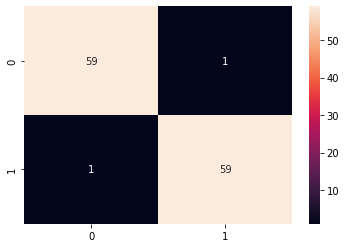

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='g')

0.9990277777777777


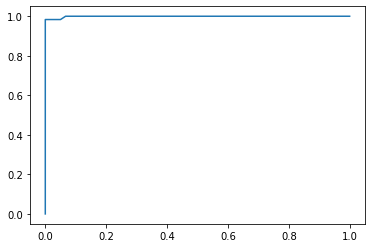

In [24]:
print(roc_auc_score(y_test, y_pred_prob[:,1]))
fpr, tpr, thres = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr, tpr)